In [2]:
#Agregacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#carga del dataset
df = pd.read_csv("datasets/breast-cancer.csv")

#mostrar las primeras filas
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#Preprocesamiento
# Convertir diagnóstico a valores numéricos
df["diagnosis"] = df["diagnosis"].map({"M":1, "B":0})

# Eliminar columnas no numéricas si existen
df = df.drop(columns=["id"], errors="ignore")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [4]:
#División en train/test
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [5]:
#Entrenamiento del Árbol de Decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [6]:
#Predicciones
y_pred = model.predict(X_test)

In [7]:
#Evaluación con métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))


Accuracy: 0.951048951048951

Matriz de Confusión:
 [[85  4]
 [ 3 51]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        89
           1       0.93      0.94      0.94        54

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [8]:
#Optimización del modelo
param_grid = {
    "max_depth": [3, 5, 7, 10, None],
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)


Mejores parámetros: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 2}


In [9]:
#Entrenar modelo optimizado
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Accuracy optimizado:", accuracy_score(y_test, y_pred_best))


Accuracy optimizado: 0.951048951048951


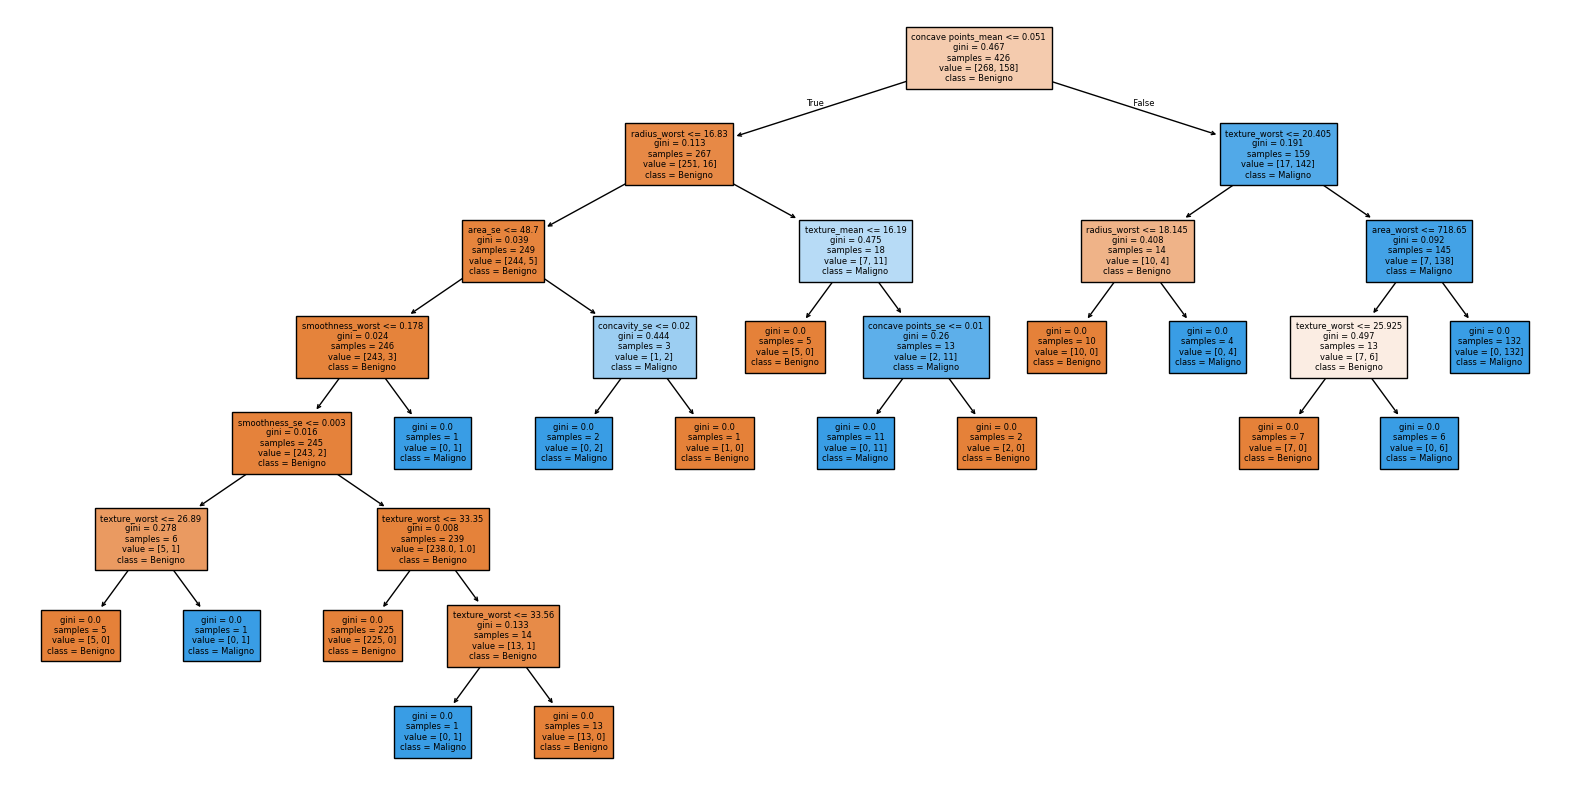

In [10]:
#Gráfica del Árbol de Decisión completo
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=X.columns, class_names=["Benigno","Maligno"],
          filled=True, fontsize=6)
plt.show()


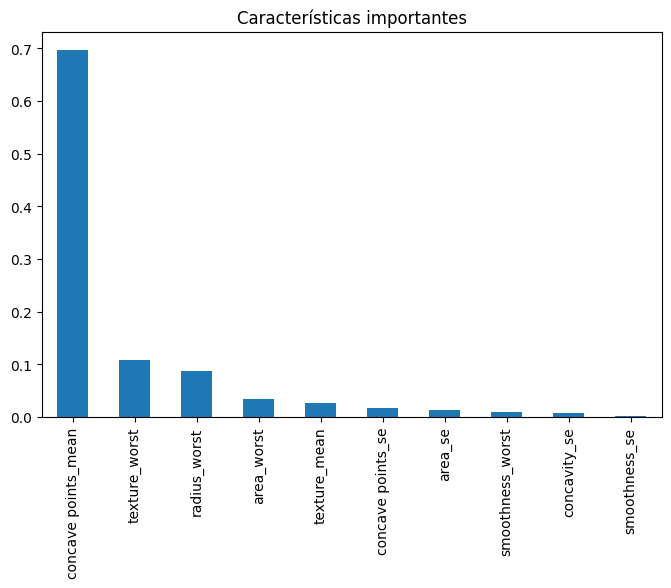

In [13]:
#Importancia de características
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind="bar", figsize=(8,5))
plt.title("Características importantes")
plt.show()
